# CREDIT RISK MODEL

# Dataset Description

The dataset includes 1,000 records with information about loan applications, including variables related to the applicant's financial status, credit history, and loan details. The goal is to analyze patterns in credit risk or build models to predict loan defaults.

## Columns

1. **checking_balance**: Customer's current account balance in deutschmarks, classified as:
   - `< 0 DM` (negative balance)
   - `1 - 200 DM`
   - `> 200 DM`
   - `unknown` (unknown balance)

2. **months_loan_duration**: Duration of the loan in months.

3. **credit_history**: Credit history of the applicant.

4. **purpose**: Purpose of the loan.

5. **amount**: Loan amount.

6. **savings_balance**: Savings account balance.

7. **employment_duration**: Length of employment.

8. **percent_of_income**: Percentage of income allocated to loan repayment.

9. **years_at_residence**: Years at the current residence.

10. **age**: Applicant's age.

11. **other_credit**: Presence of other credit agreements.

12. **housing**: Housing status (e.g., rent, own).

13. **existing_loans_count**: Number of existing loans.

14. **job**: Job type or classification.

15. **dependents**: Number of dependents.

16. **phone**: Availability of a telephone.

17. **default**: Target variable indicating loan default (`"yes"` or `"no"`).




## Set Up

In [4]:
# importing 
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [5]:
# loading data
Credit_data = pd.read_csv('credit.csv')

## Data Cleaning

In [7]:
Credit_data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [8]:
Credit_data.shape

(1000, 17)

In [9]:
# if missing data
Credit_data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [10]:
# data statistics 
Credit_data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
# info about dataframe
Credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

## Encoding

In [13]:
# encoding all non numberic data

# list of non numberic columns

column_list = Credit_data.select_dtypes(exclude=['float','int','bool']).columns.tolist()
column_list

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone',
 'default']

In [14]:
for c in column_list:
    print(Credit_data[c].value_counts())

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64
credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64
purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64
savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64
employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64
other_credit
none     814
bank     139
store     47
Name: count, dtype: int64
housing
own      713
rent     179
other    108
Name: count, dtype: int64
job
skilled       630
unskilled     200
management    148
unemployed     22
Name: count, dtype: int64
phone
no     596

In [15]:
# The column purpose has a mistake with car and car0

Credit_data['purpose'] = Credit_data['purpose'].replace('car0','car')

Credit_data['purpose'].value_counts()

purpose
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: count, dtype: int64

In [16]:
for c in column_list:
    print(c)
    print(Credit_data[c].unique())

checking_balance
['< 0 DM' '1 - 200 DM' 'unknown' '> 200 DM']
credit_history
['critical' 'good' 'poor' 'perfect' 'very good']
purpose
['furniture/appliances' 'education' 'car' 'business' 'renovations']
savings_balance
['unknown' '< 100 DM' '500 - 1000 DM' '> 1000 DM' '100 - 500 DM']
employment_duration
['> 7 years' '1 - 4 years' '4 - 7 years' 'unemployed' '< 1 year']
other_credit
['none' 'bank' 'store']
housing
['own' 'other' 'rent']
job
['skilled' 'unskilled' 'management' 'unemployed']
phone
['yes' 'no']
default
['no' 'yes']


In [17]:
#list for ordinal encoding

HieR_for_endcode = [

     ['unknown','< 0 DM', '1 - 200 DM', '> 200 DM'],
     ['critical', 'poor', 'good', 'very good', 'perfect'],
     ['unknown', '< 100 DM', '100 - 500 DM', '500 - 1000 DM', '> 1000 DM'],
     ['unemployed', '< 1 year', '1 - 4 years', '4 - 7 years', '> 7 years'],
     ['unemployed', 'unskilled', 'skilled', 'management']
    
    ]

to_endcode = ['checking_balance','credit_history','savings_balance', 'employment_duration', 'job']

In [18]:
# Ordinal encoder 

Ordinal= OrdinalEncoder(categories=HieR_for_endcode)

Credit_data[to_endcode] = Ordinal.fit_transform(Credit_data[to_endcode])

In [19]:
Credit_data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1.0,6,0.0,furniture/appliances,1169,0.0,4.0,4,4,67,none,own,2,2.0,1,yes,no
1,2.0,48,2.0,furniture/appliances,5951,1.0,2.0,2,2,22,none,own,1,2.0,1,no,yes
2,0.0,12,0.0,education,2096,1.0,3.0,2,3,49,none,own,1,1.0,2,no,no
3,1.0,42,2.0,furniture/appliances,7882,1.0,3.0,2,4,45,none,other,1,2.0,2,no,no
4,1.0,24,1.0,car,4870,1.0,2.0,3,4,53,none,other,2,2.0,2,no,yes


In [20]:
# one hot

dummie_list = ['purpose', 'other_credit', 'housing','phone']

Credit_data= pd.get_dummies(Credit_data, columns= dummie_list, dtype= int)

In [21]:
Credit_data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,phone_no,phone_yes
0,1.0,6,0.0,1169,0.0,4.0,4,4,67,2,...,1,0,0,1,0,0,1,0,0,1
1,2.0,48,2.0,5951,1.0,2.0,2,2,22,1,...,1,0,0,1,0,0,1,0,1,0
2,0.0,12,0.0,2096,1.0,3.0,2,3,49,1,...,0,0,0,1,0,0,1,0,1,0
3,1.0,42,2.0,7882,1.0,3.0,2,4,45,1,...,1,0,0,1,0,1,0,0,1,0
4,1.0,24,1.0,4870,1.0,2.0,3,4,53,2,...,0,0,0,1,0,1,0,0,1,0


In [22]:
#LabelEncoder

Label = LabelEncoder()
Credit_data['default']= Label.fit_transform(Credit_data['default'])

In [23]:
Credit_data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,purpose_furniture/appliances,purpose_renovations,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,phone_no,phone_yes
0,1.0,6,0.0,1169,0.0,4.0,4,4,67,2,...,1,0,0,1,0,0,1,0,0,1
1,2.0,48,2.0,5951,1.0,2.0,2,2,22,1,...,1,0,0,1,0,0,1,0,1,0
2,0.0,12,0.0,2096,1.0,3.0,2,3,49,1,...,0,0,0,1,0,0,1,0,1,0
3,1.0,42,2.0,7882,1.0,3.0,2,4,45,1,...,1,0,0,1,0,1,0,0,1,0
4,1.0,24,1.0,4870,1.0,2.0,3,4,53,2,...,0,0,0,1,0,1,0,0,1,0


## PyCaret

In [25]:
setup(data=Credit_data, target='default',normalize = True, fold = 5)

,Description,Value
0,Session id,6996
1,Target,default
2,Target type,Binary
3,Original data shape,"(1000, 26)"
4,Transformed data shape,"(1000, 26)"
5,Transformed train set shape,"(700, 26)"
6,Transformed test set shape,"(300, 26)"
7,Numeric features,25
8,Preprocess,True
9,Imputation type,simple


In [26]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7600,0.7745,0.4857,0.6388,0.5491,0.3899,0.3984,0.0300
et,Extra Trees Classifier,0.7543,0.7580,0.3810,0.6471,0.4772,0.3328,0.3529,0.0360
rf,Random Forest Classifier,0.7486,0.7925,0.4000,0.6274,0.4880,0.3322,0.3472,0.0420
lightgbm,Light Gradient Boosting Machine,0.7486,0.7937,0.5000,0.5893,0.5399,0.3694,0.3720,0.0880
ada,Ada Boost Classifier,0.7300,0.7320,0.4333,0.5660,0.4890,0.3106,0.3165,0.0220
ridge,Ridge Classifier,0.7257,0.7273,0.2905,0.5826,0.3862,0.2358,0.2594,0.0080
lr,Logistic Regression,0.7186,0.7272,0.3190,0.5502,0.4022,0.2364,0.2515,0.8320
lda,Linear Discriminant Analysis,0.7171,0.7275,0.3143,0.5501,0.3980,0.2318,0.2479,0.0080
dummy,Dummy Classifier,0.7000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0060
svm,SVM - Linear Kernel,0.6914,0.6339,0.3619,0.4933,0.3970,0.2041,0.2152,0.0100


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [27]:
print(best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=6996, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [28]:
finalize_model(best)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['checking_balance',
                                             'months_loan_duration',
                                             'credit_history', 'amount',
                                             'savings_balance',
                                             'employment_duration',
                                             'percent_of_income',
                                             'years_at_residence', 'age',
                                             'existing_loans_count', 'job',
                                             'dependents', 'purpose_business',
                                             'purpose_car', 'purpose_educ...
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='log_loss',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100,
                                            n_iter_no_change=None,
                                            random_state=6996, subsample=1.0,
                                            tol=0.0001, validation_fraction=0.1,
                                            verbose=0, warm_start=False))],
         verbose=False)

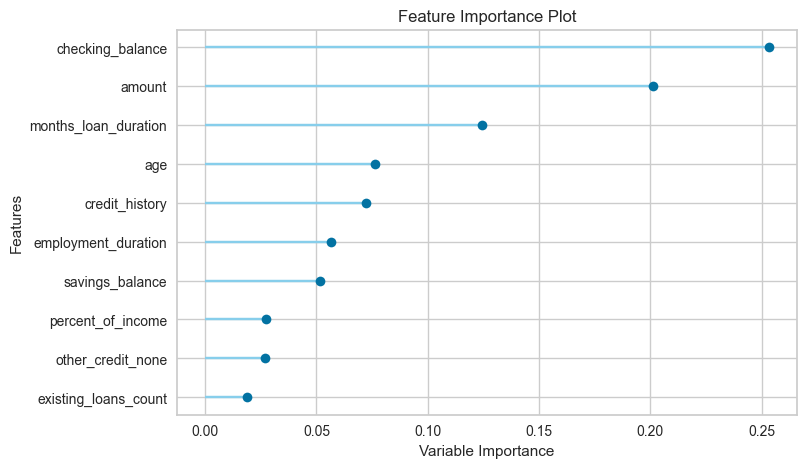

In [29]:
plot_model(best,plot='feature')